In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu

In [2]:
perfMeasurement1 = np.array([27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18, 20, 17, 31, 20, 25, 28, 21, 27])
perfMeasurement2 = np.array([21, 22, 15, 12, 21, 21, 19, 26, 22, 24, 17, 23, 19, 22, 20, 24, 18, 13, 29, 21, 19, 14, 23, 17, 20])

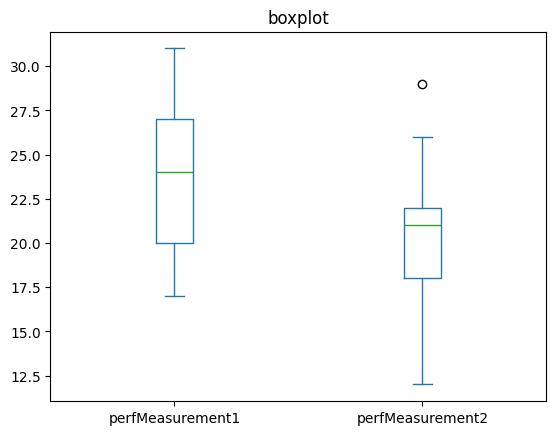

In [3]:
data = pd.DataFrame({"perfMeasurement1": perfMeasurement1, "perfMeasurement2": perfMeasurement2})
data[['perfMeasurement1', 'perfMeasurement2']].plot(kind='box', title='boxplot')
_ = plt.show()

## Statistical test

### Mann Whitney U-test

* Pre requisted for using test
* Calculate test statistic
* p-niveau
* null-hypothesis
* significant


In [4]:
np.mean(perfMeasurement1)

23.6

In [5]:
np.mean(perfMeasurement2)

20.08

In [6]:
mean = np.mean(perfMeasurement1) - np.mean(perfMeasurement2)
mean

3.520000000000003

In [7]:
concat = np.concatenate((perfMeasurement1, perfMeasurement2))

In [8]:
simulated_means = []

In [9]:
samples = 100000

In [10]:
for i in range(0, samples):
    np.random.shuffle(concat)
    simulated_means.append(
        np.mean(concat[:int(len(concat)/2)]) - np.mean(concat[int(len(concat)/2):])
    )

In [25]:
std2 = 2 * np.std(simulated_means, ddof=1)

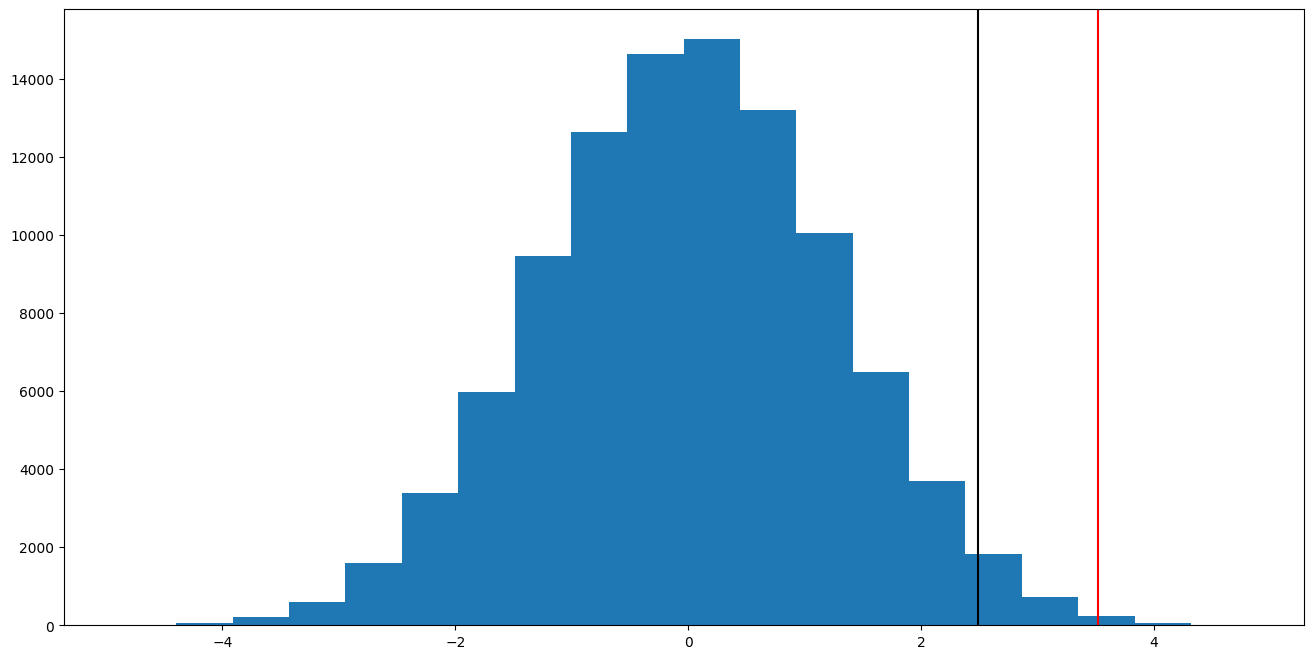

In [26]:
plt.figure(1, figsize=(16,8))
plt.hist(simulated_means, bins=20)
_ = plt.axvline(x=mean, ymax=1, linewidth=1.5, color="red");
_ = plt.axvline(x=std2, ymax=1, linewidth=1.5, color="black");

In [18]:
obs = len(np.where(simulated_means >= mean)[0]) / samples
obs

0.00205

In [21]:
alpha = 0.05
stat, p = mannwhitneyu(perfMeasurement1, perfMeasurement2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=441.500, p=0.012
Different distribution (reject H0)
